## Cell 1: Setup & Imports

In [123]:
# ============================================================
# SOCIAL MEDIA ADDICTION PREDICTION - COMPLETE ML PROJECT
# ============================================================
# This notebook contains:
# 1. Data Loading & Exploration
# 2. Feature Engineering
# 3. Preprocessing (Encoding, Scaling, Train/Test Split)
# 4. Model Training (Decision Tree, Naive Bayes, Neural Network, Linear Regression, K-Means)
# 5. Evaluation Metrics & Visualizations
# 6. Model Saving for Streamlit Interface

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve,
    mean_squared_error, mean_absolute_error, r2_score,
    silhouette_score, classification_report
)
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# Plotting settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Cell 2: Load Data

In [124]:
# ============================================================
# 1. LOAD DATA
# ============================================================
df = pd.read_csv("Students_Social_Media_Addiction_v2.csv")

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns:\n{list(df.columns)}")
print(f"\nMissing Values:\n{df.isnull().sum().sum()} total")
print(f"\nDuplicates: {df.duplicated().sum()}")

df.head()

Dataset Shape: 10000 rows × 12 columns

Columns:
['Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Affects_Academic_Performance', 'Addicted_Score']

Missing Values:
0 total

Duplicates: 0


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Affects_Academic_Performance,Addicted_Score
0,24,Female,Undergraduate,Germany,1.2,Facebook,8.1,9,Complicated,2,No,1
1,21,Female,Undergraduate,Japan,5.2,Instagram,7.8,5,Complicated,5,Yes,7
2,22,Male,High School,Australia,4.6,Facebook,6.3,7,In Relationship,1,No,5
3,24,Female,Graduate,India,3.6,Instagram,5.1,9,In Relationship,2,No,5
4,20,Male,Undergraduate,Germany,3.6,TikTok,6.5,5,Single,2,Yes,4


## Cell 3: Initial Exploration

In [125]:
# ============================================================
# 2. DATA EXPLORATION
# ============================================================
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

# Basic stats
df.describe()

DATASET OVERVIEW


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,21.008700,4.845550,6.28529,5.750900,2.242200,5.249300
std,1.998555,2.718687,1.28209,1.859461,1.449189,2.179272
min,18.000000,0.500000,4.00000,1.000000,0.000000,1.000000
25%,19.000000,2.800000,5.30000,4.000000,1.000000,4.000000
50%,21.000000,4.300000,6.30000,6.000000,2.000000,5.000000
75%,23.000000,6.400000,7.20000,7.000000,3.000000,7.000000
max,24.000000,13.000000,10.00000,10.000000,5.000000,10.000000


## Cell 4: Exploration Visualizations

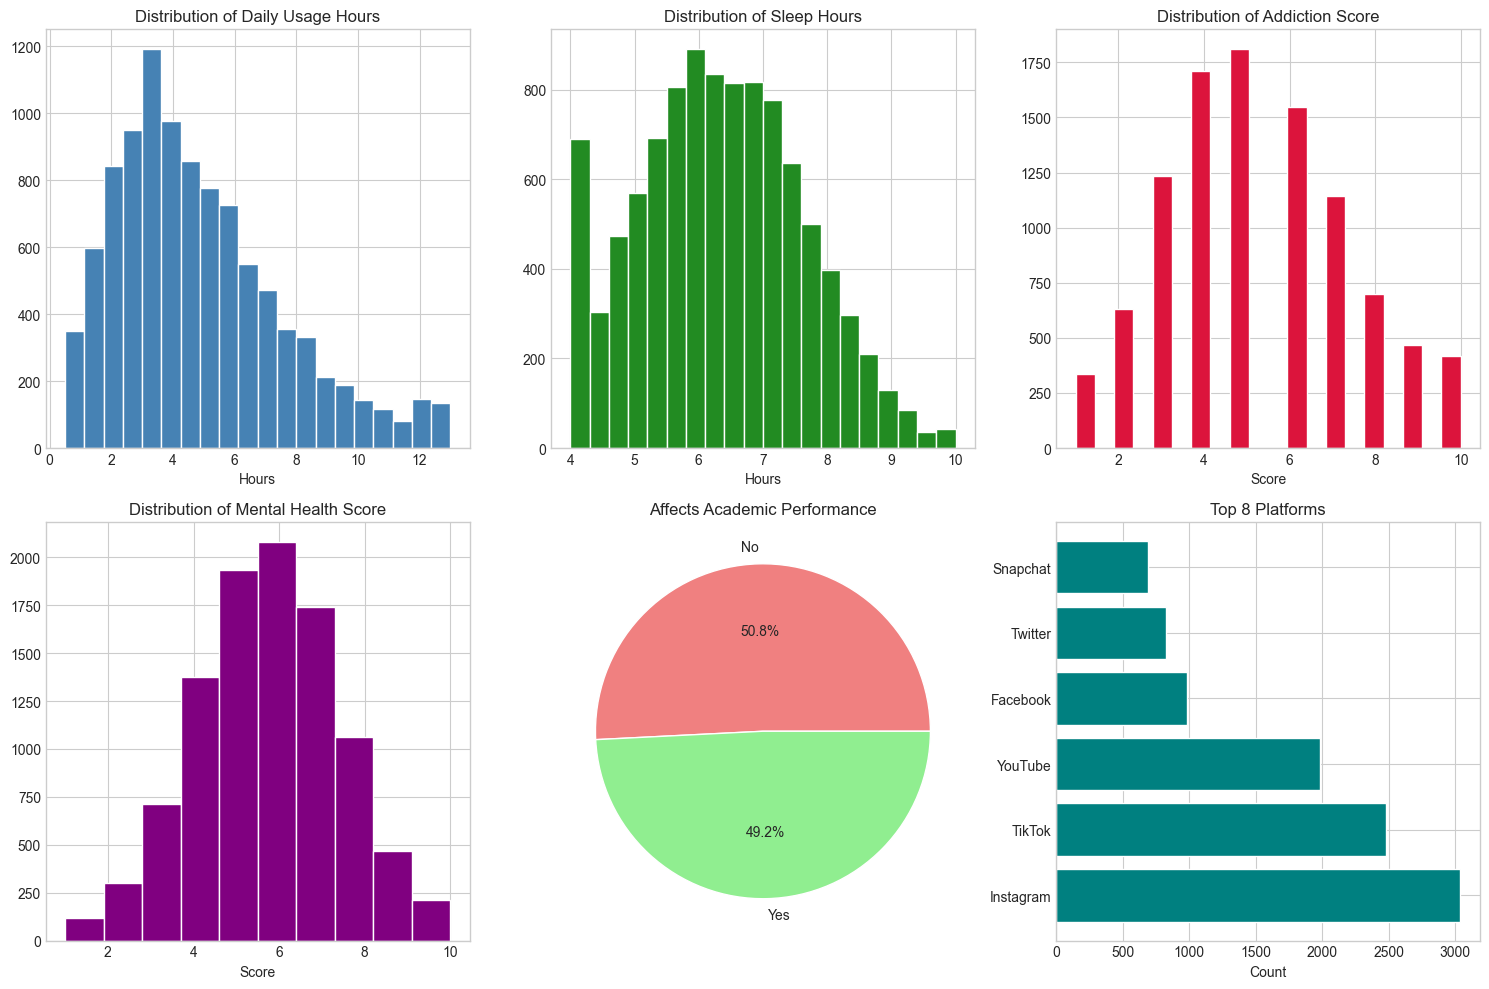

In [126]:
# Create visualizations folder if it doesn't exist
import os
os.makedirs('visualizations', exist_ok=True)

# Distribution of key variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Usage hours
axes[0, 0].hist(df['Avg_Daily_Usage_Hours'], bins=20, color='steelblue', edgecolor='white')
axes[0, 0].set_title('Distribution of Daily Usage Hours')
axes[0, 0].set_xlabel('Hours')

# Sleep hours
axes[0, 1].hist(df['Sleep_Hours_Per_Night'], bins=20, color='forestgreen', edgecolor='white')
axes[0, 1].set_title('Distribution of Sleep Hours')
axes[0, 1].set_xlabel('Hours')

# Addiction score
axes[0, 2].hist(df['Addicted_Score'], bins=20, color='crimson', edgecolor='white')
axes[0, 2].set_title('Distribution of Addiction Score')
axes[0, 2].set_xlabel('Score')

# Mental health
axes[1, 0].hist(df['Mental_Health_Score'], bins=10, color='purple', edgecolor='white')
axes[1, 0].set_title('Distribution of Mental Health Score')
axes[1, 0].set_xlabel('Score')

# Academic impact (pie)
impact_counts = df['Affects_Academic_Performance'].value_counts()
axes[1, 1].pie(impact_counts, labels=impact_counts.index, autopct='%1.1f%%',
               colors=['lightcoral', 'lightgreen'])
axes[1, 1].set_title('Affects Academic Performance')

# Platform distribution
platform_counts = df['Most_Used_Platform'].value_counts().head(8)
axes[1, 2].barh(platform_counts.index, platform_counts.values, color='teal')
axes[1, 2].set_title('Top 8 Platforms')
axes[1, 2].set_xlabel('Count')

plt.tight_layout()
plt.savefig('visualizations/data_exploration.png', dpi=150, bbox_inches='tight')
plt.show()

## Cell 5: Correlation Analysis

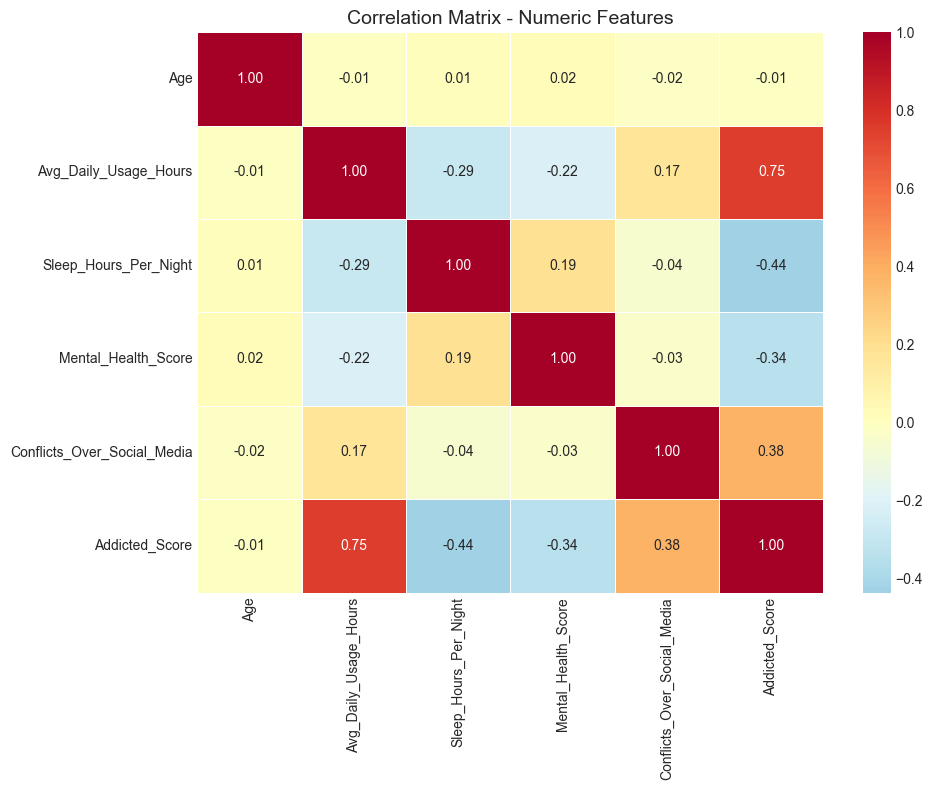


Key Correlations with Addicted_Score:
Addicted_Score                 1.000000
Avg_Daily_Usage_Hours          0.749404
Conflicts_Over_Social_Media    0.381214
Age                           -0.007203
Mental_Health_Score           -0.344162
Sleep_Hours_Per_Night         -0.436838
Name: Addicted_Score, dtype: float64


In [127]:
# Correlation heatmap (numeric columns only)
numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.2f', linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix - Numeric Features', fontsize=14)
plt.tight_layout()
plt.savefig('visualizations/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nKey Correlations with Addicted_Score:")
print(correlation_matrix['Addicted_Score'].sort_values(ascending=False))

## Cell 6: Feature Engineering

In [128]:
# ============================================================
# 3. FEATURE ENGINEERING
# ============================================================
print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# Drop Student_ID (not a feature)
##df = df.drop(columns=['Student_ID'])
##print("✓ Dropped Student_ID")

# 3.1 Region from Country
try:
    import country_converter as coco
    fallback_map = {
        'UAE': 'Western Asia', 'UK': 'Northern Europe',
        'South Korea': 'Eastern Asia', 'Vietnam': 'South-eastern Asia',
        'Palestine': 'Western Asia'
    }
    df['Region'] = coco.convert(names=df['Country'].tolist(), to='UNregion', not_found=None)
    for idx in df[df['Region'].isna()].index:
        country = df.loc[idx, 'Country']
        df.loc[idx, 'Region'] = fallback_map.get(country, 'Other')
    print("✓ Region created from Country")
except ImportError:
    print("⚠ country_converter not installed; using 'Global' for all")
    df['Region'] = 'Global'

# 3.2 Sleep Deficit
df['Sleep_Deficit'] = np.maximum(0, 8 - df['Sleep_Hours_Per_Night'])
print("✓ Sleep_Deficit created (hours below 8)")

# 2. TIME DISPLACEMENT: "Digital Life Percentage"
# Calculates what % of their *awake* time is spent on social media.
# More accurate than raw hours because it accounts for available time.
df['Awake_Time'] = 24 - df['Sleep_Hours_Per_Night']
df['Digital_Life_Percentage'] = df['Avg_Daily_Usage_Hours'] / df['Awake_Time']
print("✓ Digital life percentage created (%)")

# 3. PSYCHOLOGICAL RELIANCE: "Escapism Ratio"
# High usage combined with low mental health suggests usage is a coping mechanism.
# We add +1 to Mental Health to avoid division by zero.
df['Escapism_Ratio'] = df['Avg_Daily_Usage_Hours'] / (df['Mental_Health_Score'] + 1)
print("✓ Escapism Ratio created")

# 4. SOCIAL DYSFUNCTION: "Toxic Usage Score"
# Amplifies the risk signal when high usage is accompanied by conflicts.
# The +1 ensures that 0 conflicts doesn't zero out the usage entirely.
df['Toxic_Usage_Score'] = df['Avg_Daily_Usage_Hours'] * (df['Conflicts_Over_Social_Media'] + 1)
print("✓ Toxic Usage Score Created")

# 5. DEMOGRAPHIC VULNERABILITY: "Young Visual User"
# Identifies a high-risk demographic: Under 21s using visual-heavy, addictive platforms.
df['Young_Visual_User'] = (
    (df['Age'] < 21) &
    (df['Most_Used_Platform'].isin(['TikTok', 'Instagram']))
).astype(int)
print("✓ Young Visual User Created")

# 6. BEHAVIORAL FLAG: "The Vampire Index"
# A binary flag (0 or 1) for students sacrificing sleep for screens.
# Logic: Usage > 6 hours AND Sleep < 5 hours.
df['Vampire_Index'] = (
    (df['Avg_Daily_Usage_Hours'] > 6) &
    (df['Sleep_Hours_Per_Night'] < 5)
).astype(int)
print("✓ Vampire Index created")
# 3.5 Addiction Risk Score (composite)
df['Usage_Norm'] = (df['Avg_Daily_Usage_Hours'] - df['Avg_Daily_Usage_Hours'].min()) / \
                   (df['Avg_Daily_Usage_Hours'].max() - df['Avg_Daily_Usage_Hours'].min())
df['Sleep_Deficit_Norm'] = (df['Sleep_Deficit'] - df['Sleep_Deficit'].min()) / \
                           (df['Sleep_Deficit'].max() - df['Sleep_Deficit'].min() + 0.001)
df['Conflict_Norm'] = (df['Conflicts_Over_Social_Media'] - df['Conflicts_Over_Social_Media'].min()) / \
                      (df['Conflicts_Over_Social_Media'].max() - df['Conflicts_Over_Social_Media'].min())
df['Mental_Health_Inv_Norm'] = 1 - ((df['Mental_Health_Score'] - df['Mental_Health_Score'].min()) / \
                                    (df['Mental_Health_Score'].max() - df['Mental_Health_Score'].min()))

df['Addiction_Risk_Score'] = (
    0.35 * df['Usage_Norm'] +
    0.25 * df['Sleep_Deficit_Norm'] +
    0.20 * df['Conflict_Norm'] +
    0.20 * df['Mental_Health_Inv_Norm']
)
print("✓ Addiction_Risk_Score created (composite)")

# Drop helper columns
df = df.drop(columns=['Usage_Norm', 'Sleep_Deficit_Norm', 'Conflict_Norm', 'Mental_Health_Inv_Norm','Awake_Time'])

print(f"\n✓ Total columns after engineering: {df.shape[1]}")
print(f"New features: Region, Sleep_Deficit, Digital_Life_Percentage, Escapism_Ratio, Toxic_Usage_Score, Young_Visual_User, Vampire_Index")
# Verification
new_features = [
    'Sleep_Deficit', 'Digital_Life_Percentage', 'Escapism_Ratio',
    'Toxic_Usage_Score', 'Young_Visual_User', 'Vampire_Index'
]
print(f"✅ Engineering Complete. Created {len(new_features)} new features.")
print(df[new_features].head())

FEATURE ENGINEERING
✓ Region created from Country
✓ Sleep_Deficit created (hours below 8)
✓ Digital life percentage created (%)
✓ Escapism Ratio created
✓ Toxic Usage Score Created
✓ Young Visual User Created
✓ Vampire Index created
✓ Addiction_Risk_Score created (composite)

✓ Total columns after engineering: 20
New features: Region, Sleep_Deficit, Digital_Life_Percentage, Escapism_Ratio, Toxic_Usage_Score, Young_Visual_User, Vampire_Index
✅ Engineering Complete. Created 6 new features.
   Sleep_Deficit  Digital_Life_Percentage  Escapism_Ratio  Toxic_Usage_Score  \
0            0.0                 0.075472        0.120000                3.6   
1            0.2                 0.320988        0.866667               31.2   
2            1.7                 0.259887        0.575000                9.2   
3            2.9                 0.190476        0.360000               10.8   
4            1.5                 0.205714        0.600000               10.8   

   Young_Visual_User  Vamp

## Cell 7: Define Targets

In [129]:
# ============================================================
# 4. DEFINE TARGETS
# ============================================================
print("=" * 60)
print("TARGET VARIABLES")
print("=" * 60)


# Classification target
y_class = (df['Affects_Academic_Performance'] == 'Yes').astype(int)
print(f"\n✓ Classification Target: Affects_Academic_Performance")
print(f"  Class 0 (No):  {(y_class == 0).sum()} ({(y_class == 0).mean()*100:.1f}%)")
print(f"  Class 1 (Yes): {(y_class == 1).sum()} ({(y_class == 1).mean()*100:.1f}%)")
# --- OPTION: Create a stricter, data-driven target ---
# Instead of trusting the student's opinion on academic performance,
# let's predict if they fall into the "High Risk" category based on the score.

# Calculate the median or set a threshold (e.g., 7)
threshold = 7
y_class_new = (df['Addicted_Score'] >= threshold).astype(int)

print(f"New Target (High Addiction Risk > {threshold}):")
print(y_class_new.value_counts(normalize=True))

# Overwrite the old target variable
y_class = y_class_new
# Regression target
y_reg = df['Addicted_Score'].copy()
print(f"\n✓ Regression Target: Addicted_Score")
print(f"  Mean: {y_reg.mean():.2f}, Std: {y_reg.std():.2f}, Range: [{y_reg.min()}, {y_reg.max()}]")

TARGET VARIABLES

✓ Classification Target: Affects_Academic_Performance
  Class 0 (No):  5080 (50.8%)
  Class 1 (Yes): 4920 (49.2%)
New Target (High Addiction Risk > 7):
Addicted_Score
0    0.7268
1    0.2732
Name: proportion, dtype: float64

✓ Regression Target: Addicted_Score
  Mean: 5.25, Std: 2.18, Range: [1, 10]


## Cell 8: Prepare Features

In [130]:
# ============================================================
# 5. PREPARE FEATURE MATRICES
# ============================================================
print("=" * 60)
print("FEATURE PREPARATION")
print("=" * 60)

# Feature columns for classification
feature_cols = [
   'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours',
    'Most_Used_Platform', 'Sleep_Hours_Per_Night', 'Mental_Health_Score',
    'Relationship_Status', 'Conflicts_Over_Social_Media', 'Region', 'Addicted_Score',
    'Sleep_Deficit', 'Digital_Life_Percentage', 'Escapism_Ratio',
    'Toxic_Usage_Score', 'Young_Visual_User', 'Vampire_Index'
]

# For regression, add Affects_Academic_Performance as feature
feature_cols_reg = feature_cols + ['Affects_Academic_Performance']

X_class_raw = df[feature_cols].copy().drop('Addicted_Score', axis=1)
X_reg_raw = df[feature_cols_reg].copy().drop('Addicted_Score', axis=1)

print(f"✓ Classification features: {len(feature_cols)}")
print(f"✓ Regression features: {len(feature_cols_reg)}")

# Define categorical and numeric columns
categorical_cols = ['Gender', 'Academic_Level', 'Country',
                    'Most_Used_Platform', 'Relationship_Status', 'Region', 'Young_Visual_User',
    'Vampire_Index']
categorical_cols_reg = categorical_cols + ['Affects_Academic_Performance']

numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score',
                'Sleep_Deficit',
    'Digital_Life_Percentage',
    'Escapism_Ratio',
    'Toxic_Usage_Score']

print(f"\n✓ Categorical columns: {len(categorical_cols)}")
print(f"✓ Numeric columns: {len(numeric_cols)}")

FEATURE PREPARATION
✓ Classification features: 18
✓ Regression features: 19

✓ Categorical columns: 8
✓ Numeric columns: 10


## Cell 9: Encoding

In [131]:
# ============================================================
# 6. CATEGORICAL ENCODING
# ============================================================
print("=" * 60)
print("ENCODING")
print("=" * 60)

# ONE-HOT ENCODING (for Naive Bayes, Neural Network, Linear Regression)
X_class_onehot = pd.get_dummies(X_class_raw, columns=categorical_cols, drop_first=True)
X_reg_onehot = pd.get_dummies(X_reg_raw, columns=categorical_cols_reg, drop_first=True)

print(f"✓ One-hot encoded (Classification): {X_class_onehot.shape[1]} features")
print(f"✓ One-hot encoded (Regression): {X_reg_onehot.shape[1]} features")

# LABEL ENCODING (for Decision Tree)
X_class_label = X_class_raw.copy()
X_reg_label = X_reg_raw.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_class_label[col] = le.fit_transform(X_class_label[col])
    X_reg_label[col] = le.fit_transform(X_reg_label[col])
    label_encoders[col] = le

# Encode Affects_Academic_Performance for regression
le_aap = LabelEncoder()
X_reg_label['Affects_Academic_Performance'] = le_aap.fit_transform(X_reg_label['Affects_Academic_Performance'])
label_encoders['Affects_Academic_Performance'] = le_aap

print(f"✓ Label encoded: {len(label_encoders)} encoders saved")

ENCODING
✓ One-hot encoded (Classification): 37 features
✓ One-hot encoded (Regression): 38 features
✓ Label encoded: 9 encoders saved


## Cell 10: Train/Test Split

In [132]:
# ============================================================
# 7. TRAIN/TEST SPLIT
# ============================================================
print("=" * 60)
print("TRAIN/TEST SPLIT (70/30)")
print("=" * 60)

RANDOM_STATE = 42
TEST_SIZE = 0.3

# Classification (one-hot)
X_train_oh, X_test_oh, y_train_class, y_test_class = train_test_split(
    X_class_onehot, y_class, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_class
)
if 'Addicted_Score' in X_train_oh.columns:
    print("⚠️ DANGER: Target leakage detected! Drop 'Addicted_Score' from X inputs.")
else:
    print("✅ SAFE: Target is not in the input features.")
# Classification (label-encoded for Decision Tree)
X_train_lbl, X_test_lbl, _, _ = train_test_split(
    X_class_label, y_class, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_class
)
if 'Addicted_Score' in X_train_oh.columns:
    print("⚠️ DANGER: Target leakage detected! Drop 'Addicted_Score' from X inputs.")
else:
    print("✅ SAFE: Target is not in the input features.")
# Regression (one-hot)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_onehot, y_reg, test_size=TEST_SIZE, random_state=RANDOM_STATE
)
if 'Addicted_Score' in X_train_oh.columns:
    print("⚠️ DANGER: Target leakage detected! Drop 'Addicted_Score' from X inputs.")
else:
    print("✅ SAFE: Target is not in the input features.")
print(f"✓ Classification - Train: {X_train_oh.shape}, Test: {X_test_oh.shape}")
print(f"✓ Regression - Train: {X_train_reg.shape}, Test: {X_test_reg.shape}")
print(f"\n✓ Class distribution preserved (stratified split)")

TRAIN/TEST SPLIT (70/30)
✅ SAFE: Target is not in the input features.
✅ SAFE: Target is not in the input features.
✅ SAFE: Target is not in the input features.
✓ Classification - Train: (7000, 37), Test: (3000, 37)
✓ Regression - Train: (7000, 38), Test: (3000, 38)

✓ Class distribution preserved (stratified split)


## Cell 11: Scaling

In [133]:
# ============================================================
# 8. FEATURE SCALING
# ============================================================
print("=" * 60)
print("FEATURE SCALING (StandardScaler)")
print("=" * 60)

TARGET = 'Addicted_Score'

# Numeric feature columns for X only (remove target if it sneaks in)
numeric_cols_X = [c for c in numeric_cols if c != TARGET]

# Scale classification data
numeric_cols_in_Xoh = [c for c in numeric_cols_X if c in X_train_oh.columns]
scaler_class = StandardScaler()
X_train_oh[numeric_cols_in_Xoh] = scaler_class.fit_transform(X_train_oh[numeric_cols_in_Xoh])
X_test_oh[numeric_cols_in_Xoh]  = scaler_class.transform(X_test_oh[numeric_cols_in_Xoh])
print("✓ Classification features scaled")

# Scale regression data
numeric_cols_in_Xreg = [c for c in numeric_cols_X if c in X_train_reg.columns]
scaler_reg = StandardScaler()
X_train_reg[numeric_cols_in_Xreg] = scaler_reg.fit_transform(X_train_reg[numeric_cols_in_Xreg])
X_test_reg[numeric_cols_in_Xreg]  = scaler_reg.transform(X_test_reg[numeric_cols_in_Xreg])
print("✓ Regression features scaled")

# Prepare K-Means data (numeric only, full dataset)
kmeans_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
               'Mental_Health_Score', 'Conflicts_Over_Social_Media',
               'Addicted_Score', 'Sleep_Deficit', 'Digital_Life_Percentage','Escapism_Ratio',
    'Toxic_Usage_Score']

X_kmeans = df[kmeans_cols].copy()
scaler_kmeans = StandardScaler()
X_kmeans_scaled = pd.DataFrame(
    scaler_kmeans.fit_transform(X_kmeans),
    columns=kmeans_cols,
    index=X_kmeans.index
)
print(f"✓ K-Means data prepared: {X_kmeans_scaled.shape}")

print("\n✓ PREPROCESSING COMPLETE!")

FEATURE SCALING (StandardScaler)
✓ Classification features scaled
✓ Regression features scaled
✓ K-Means data prepared: (10000, 10)

✓ PREPROCESSING COMPLETE!


## Cell 12: Decision Tree Training

In [134]:
# ============================================================
# 9. MODEL 1: DECISION TREE CLASSIFIER
# ============================================================
print("=" * 60)
print("DECISION TREE CLASSIFIER")
print("=" * 60)

dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=RANDOM_STATE
)

dt_model.fit(X_train_lbl, y_train_class)
y_pred_dt = dt_model.predict(X_test_lbl)
y_prob_dt = dt_model.predict_proba(X_test_lbl)[:, 1]

# Metrics
dt_accuracy = accuracy_score(y_test_class, y_pred_dt)
dt_precision = precision_score(y_test_class, y_pred_dt)
dt_recall = recall_score(y_test_class, y_pred_dt)
dt_f1 = f1_score(y_test_class, y_pred_dt)
dt_auc = roc_auc_score(y_test_class, y_prob_dt)

print(f"\n✓ Model trained successfully")
print(f"\nClassification Report:")
print(classification_report(y_test_class, y_pred_dt, target_names=['No', 'Yes']))

print(f"ROC-AUC Score: {dt_auc:.4f}")

# Store results
dt_results = {
    'accuracy': dt_accuracy, 'precision': dt_precision,
    'recall': dt_recall, 'f1': dt_f1, 'auc': dt_auc,
    'y_pred': y_pred_dt, 'y_prob': y_prob_dt
}
print(f"\nChecking Overfitting:")
# Use X_train_lbl because Decision Tree was trained on label-encoded data
train_acc = dt_model.score(X_train_lbl, y_train_class)
test_acc = accuracy_score(y_test_class, y_pred_dt)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Difference:        {train_acc - test_acc:.4f}")
# ---------------------------

print(f"\n✓ Model trained successfully")
# ... (rest of the print statements)


DECISION TREE CLASSIFIER

✓ Model trained successfully

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.90      0.88      2180
         Yes       0.70      0.63      0.67       820

    accuracy                           0.83      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.82      0.83      0.82      3000

ROC-AUC Score: 0.8244

Checking Overfitting:
Training Accuracy: 0.9297
Testing Accuracy:  0.8263
Difference:        0.1034

✓ Model trained successfully


## Cell 13: Decision Tree Visualization

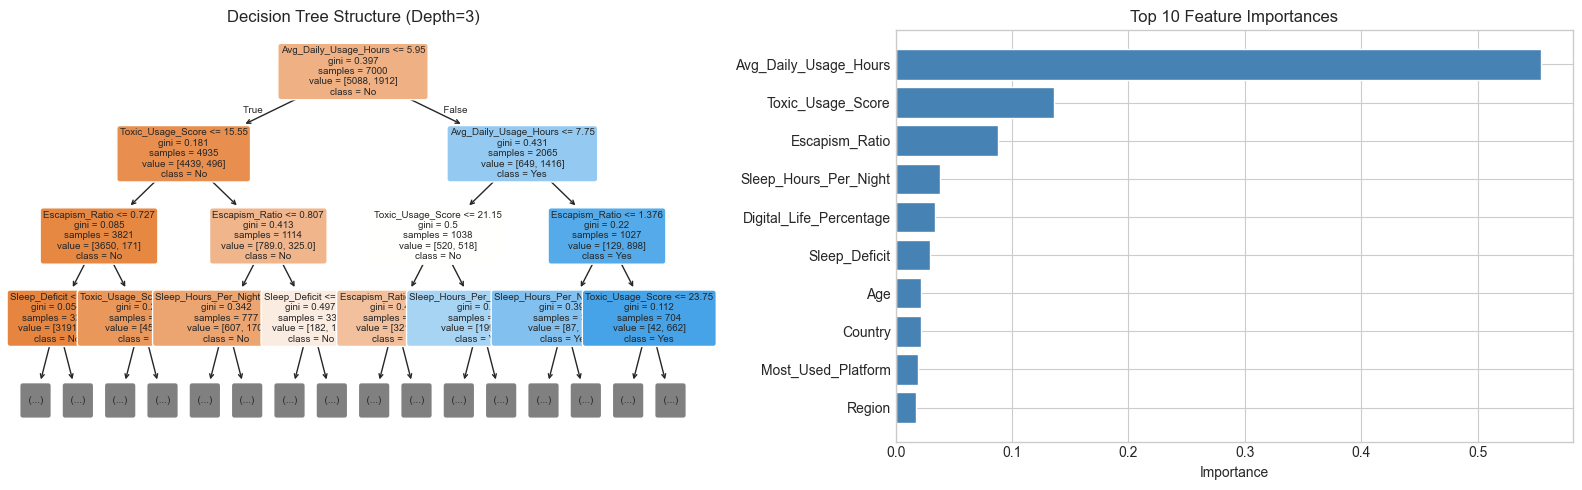


Top 5 Most Important Features:
  Avg_Daily_Usage_Hours: 0.5541
  Toxic_Usage_Score: 0.1358
  Escapism_Ratio: 0.0878
  Sleep_Hours_Per_Night: 0.0379
  Digital_Life_Percentage: 0.0335


In [135]:
# Decision Tree Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Tree structure (limited depth)
plt.subplot(1, 2, 1)
plot_tree(dt_model, max_depth=3, filled=True, rounded=True,
          feature_names=X_train_lbl.columns.tolist(),
          class_names=['No', 'Yes'], fontsize=7)
plt.title('Decision Tree Structure (Depth=3)')

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X_train_lbl.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=True).tail(10)

plt.subplot(1, 2, 2)
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')

plt.tight_layout()
plt.savefig('visualizations/decision_tree_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nTop 5 Most Important Features:")
for _, row in importance_df.tail(5).iloc[::-1].iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")



## Cell 14: Naive Bayes Training

In [136]:
# ============================================================
# 10. MODEL 2: NAIVE BAYES CLASSIFIER
# ============================================================
print("=" * 60)
print("NAIVE BAYES CLASSIFIER (Gaussian)")
print("=" * 60)

nb_model = GaussianNB()
nb_model.fit(X_train_oh, y_train_class)
y_pred_nb = nb_model.predict(X_test_oh)
y_prob_nb = nb_model.predict_proba(X_test_oh)[:, 1]

# Metrics
nb_accuracy = accuracy_score(y_test_class, y_pred_nb)
nb_precision = precision_score(y_test_class, y_pred_nb)
nb_recall = recall_score(y_test_class, y_pred_nb)
nb_f1 = f1_score(y_test_class, y_pred_nb)
nb_auc = roc_auc_score(y_test_class, y_prob_nb)

print(f"\n✓ Model trained successfully")
print(f"\nClassification Report:")
print(classification_report(y_test_class, y_pred_nb, target_names=['No', 'Yes']))

print(f"ROC-AUC Score: {nb_auc:.4f}")

nb_results = {
    'accuracy': nb_accuracy, 'precision': nb_precision,
    'recall': nb_recall, 'f1': nb_f1, 'auc': nb_auc,
    'y_pred': y_pred_nb, 'y_prob': y_prob_nb
}
# ADD OVERFITTING CHECK HERE:
train_acc_dt = nb_model.score(X_train_oh, y_train_class)  # Same format as fit()
test_acc_dt = accuracy_score(y_test_class, y_pred_dt)
print(f"\nOverfitting Check:")
print(f"Training Accuracy: {train_acc_dt:.4f}")
print(f"Testing Accuracy:  {test_acc_dt:.4f}")
print(f"Gap: {train_acc_dt - test_acc_dt:.4f}")
if train_acc_dt - test_acc_dt > 0.1:
    print("⚠️ Warning: Significant overfitting detected (gap > 10%)")

NAIVE BAYES CLASSIFIER (Gaussian)

✓ Model trained successfully

Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.92      0.91      2180
         Yes       0.77      0.70      0.73       820

    accuracy                           0.86      3000
   macro avg       0.83      0.81      0.82      3000
weighted avg       0.86      0.86      0.86      3000

ROC-AUC Score: 0.9156

Overfitting Check:
Training Accuracy: 0.8696
Testing Accuracy:  0.8263
Gap: 0.0432


In [137]:
# Check if target correlates with key features
#print("\n--- Target Analysis ---")
#print(df.groupby('Affects_Academic_Performance')[
 #   ['Avg_Daily_Usage_Hours', 'Addicted_Score', 'Mental_Health_Score', 'Sleep_Hours_Per_Night']
#].mean())

## Cell 15: Neural Network Training

NEURAL NETWORK CLASSIFIER (MLP)

✓ Model trained successfully
  Architecture: Input(37) → 32 → 16 → Output(2)
  Iterations: 29

Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.93      0.91      2180
         Yes       0.80      0.71      0.75       820

    accuracy                           0.87      3000
   macro avg       0.85      0.82      0.83      3000
weighted avg       0.87      0.87      0.87      3000

ROC-AUC Score: 0.9214

Overfitting Check:
Training Accuracy: 0.8809
Testing Accuracy:  0.8263
Gap: 0.0545


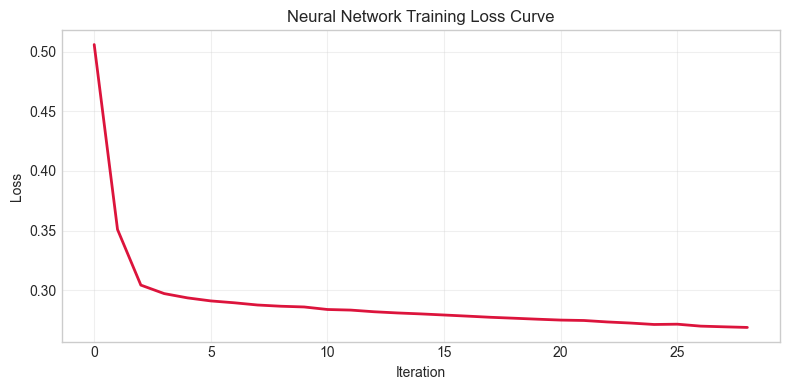

In [138]:
# ============================================================
# 11. MODEL 3: NEURAL NETWORK (MLP)
# ============================================================
print("=" * 60)
print("NEURAL NETWORK CLASSIFIER (MLP)")
print("=" * 60)

nn_model = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    max_iter=500,
    random_state=RANDOM_STATE,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=False
)

nn_model.fit(X_train_oh, y_train_class)
y_pred_nn = nn_model.predict(X_test_oh)
y_prob_nn = nn_model.predict_proba(X_test_oh)[:, 1]

# Metrics
nn_accuracy = accuracy_score(y_test_class, y_pred_nn)
nn_precision = precision_score(y_test_class, y_pred_nn)
nn_recall = recall_score(y_test_class, y_pred_nn)
nn_f1 = f1_score(y_test_class, y_pred_nn)
nn_auc = roc_auc_score(y_test_class, y_prob_nn)

print(f"\n✓ Model trained successfully")
print(f"  Architecture: Input({X_train_oh.shape[1]}) → 32 → 16 → Output(2)")
print(f"  Iterations: {nn_model.n_iter_}")
print(f"\nClassification Report:")
print(classification_report(y_test_class, y_pred_nn, target_names=['No', 'Yes']))

print(f"ROC-AUC Score: {nn_auc:.4f}")

nn_results = {
    'accuracy': nn_accuracy, 'precision': nn_precision,
    'recall': nn_recall, 'f1': nn_f1, 'auc': nn_auc,
    'y_pred': y_pred_nn, 'y_prob': y_prob_nn
}
# ADD OVERFITTING CHECK HERE:
train_acc_dt = nn_model.score(X_train_oh, y_train_class)  # Same format as fit()
test_acc_dt = accuracy_score(y_test_class, y_pred_dt)
print(f"\nOverfitting Check:")
print(f"Training Accuracy: {train_acc_dt:.4f}")
print(f"Testing Accuracy:  {test_acc_dt:.4f}")
print(f"Gap: {train_acc_dt - test_acc_dt:.4f}")
if train_acc_dt - test_acc_dt > 0.1:
    print("⚠️ Warning: Significant overfitting detected (gap > 10%)")

# Loss curve
plt.figure(figsize=(8, 4))
plt.plot(nn_model.loss_curve_, color='crimson', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss Curve')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/nn_loss_curve.png', dpi=150, bbox_inches='tight')
plt.show()

## Cell 16: Classification Comparison Visualizations

CLASSIFICATION MODELS COMPARISON


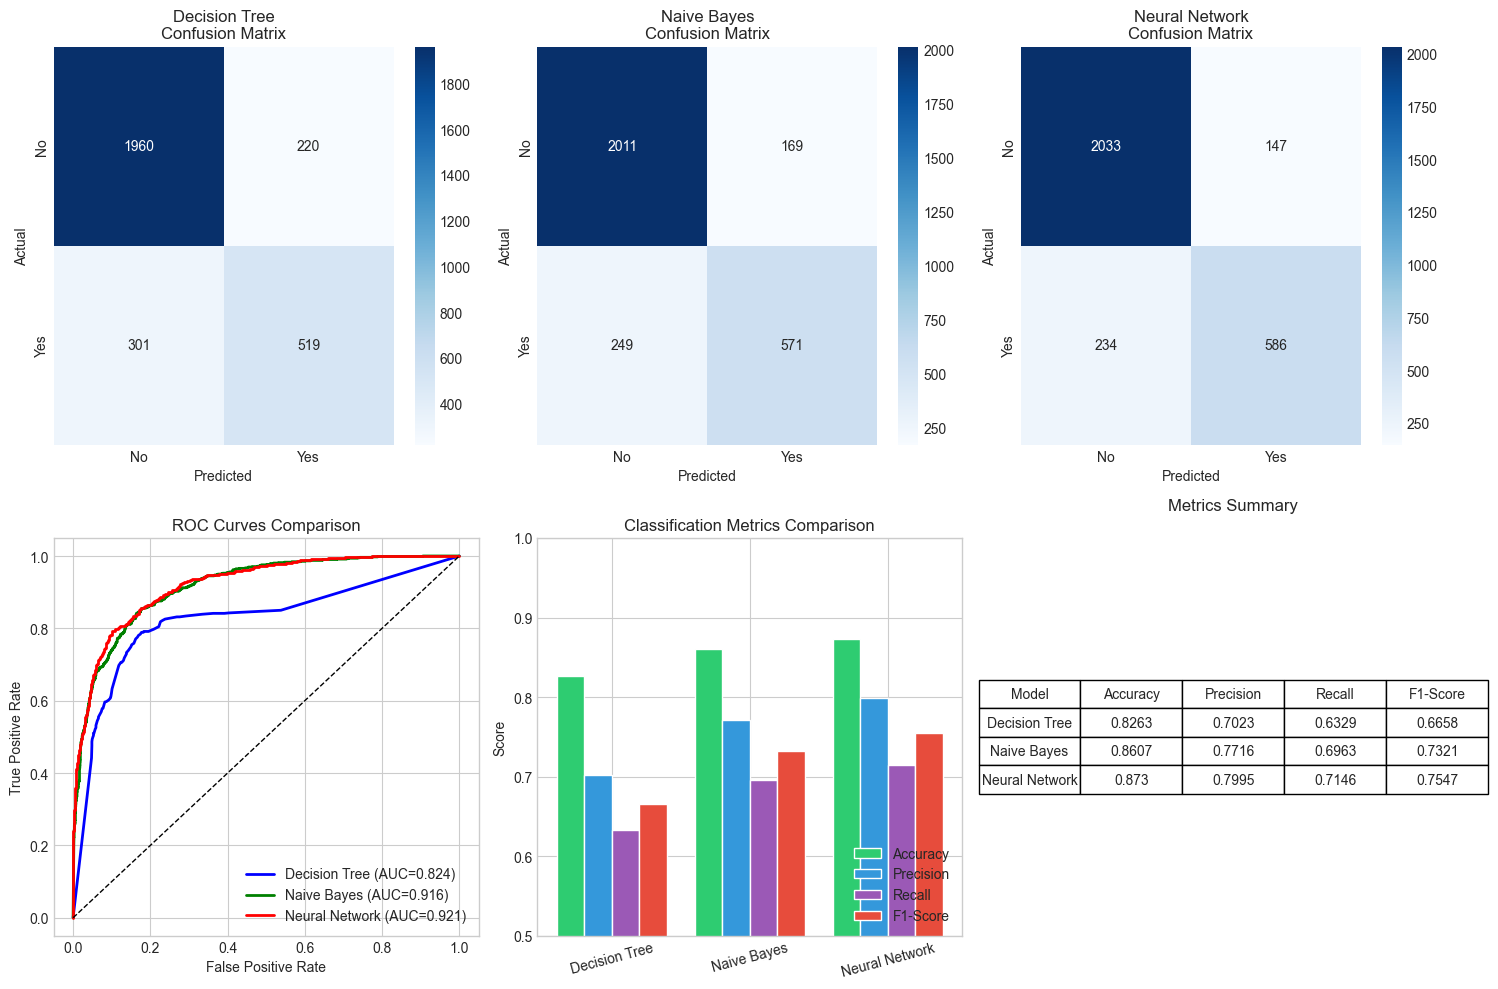


Classification Results Summary:
         Model  Accuracy  Precision   Recall  F1-Score
 Decision Tree  0.826333   0.702300 0.632927  0.665811
   Naive Bayes  0.860667   0.771622 0.696341  0.732051
Neural Network  0.873000   0.799454 0.714634  0.754668
            Model  Accuracy  Precision    Recall  F1-Score
2  Neural Network  0.873000   0.799454  0.714634  0.754668
1     Naive Bayes  0.860667   0.771622  0.696341  0.732051
0   Decision Tree  0.826333   0.702300  0.632927  0.665811

Best Model: Neural Network
Ensemble Accuracy: 0.8643
Best Individual Model: 0.8730


In [139]:
# ============================================================
# 12. CLASSIFICATION MODELS COMPARISON
# ============================================================
print("=" * 60)
print("CLASSIFICATION MODELS COMPARISON")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Confusion Matrices
models_class = [
    ('Decision Tree', y_pred_dt),
    ('Naive Bayes', y_pred_nb),
    ('Neural Network', y_pred_nn)
]

for idx, (name, y_pred) in enumerate(models_class):
    cm = confusion_matrix(y_test_class, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, idx],
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    axes[0, idx].set_title(f'{name}\nConfusion Matrix')
    axes[0, idx].set_xlabel('Predicted')
    axes[0, idx].set_ylabel('Actual')

# Row 2: ROC Curves (combined) + Metrics comparison
# ROC Curves
ax_roc = axes[1, 0]
for name, y_prob, color in [('Decision Tree', y_prob_dt, 'blue'),
                             ('Naive Bayes', y_prob_nb, 'green'),
                             ('Neural Network', y_prob_nn, 'red')]:
    fpr, tpr, _ = roc_curve(y_test_class, y_prob)
    auc_score = roc_auc_score(y_test_class, y_prob)
    ax_roc.plot(fpr, tpr, color=color, linewidth=2, label=f'{name} (AUC={auc_score:.3f})')

ax_roc.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curves Comparison')
ax_roc.legend(loc='lower right')

# Metrics bar chart
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes', 'Neural Network'],
    'Accuracy': [dt_accuracy, nb_accuracy, nn_accuracy],
    'Precision': [dt_precision, nb_precision, nn_precision],
    'Recall': [dt_recall, nb_recall, nn_recall],
    'F1-Score': [dt_f1, nb_f1, nn_f1]
})

ax_bar = axes[1, 1]
x = np.arange(3)
width = 0.2
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    ax_bar.bar(x + i*width, metrics_df[metric], width, label=metric, color=colors[i])

ax_bar.set_xticks(x + 1.5*width)
ax_bar.set_xticklabels(metrics_df['Model'], rotation=15)
ax_bar.set_ylabel('Score')
ax_bar.set_title('Classification Metrics Comparison')
ax_bar.legend(loc='lower right')
ax_bar.set_ylim([0.5, 1.0])

# Summary table
axes[1, 2].axis('off')
table_data = metrics_df.round(4).values.tolist()
table = axes[1, 2].table(
    cellText=table_data,
    colLabels=metrics_df.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1, 2].set_title('Metrics Summary', pad=20)

plt.tight_layout()
plt.savefig('visualizations/classification_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary
print("\nClassification Results Summary:")
print(metrics_df.to_string(index=False))
# After running all models, you can create a comparison table
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes', 'Neural Network'],
    'Accuracy': [dt_accuracy, nb_accuracy, nn_accuracy],
    'Precision': [dt_precision, nb_precision, nn_precision],
    'Recall': [dt_recall, nb_recall, nn_recall],
    'F1-Score': [dt_f1, nb_f1, nn_f1]
     # if you track this
})

print(model_comparison.sort_values('F1-Score', ascending=False))
print(f"\nBest Model: {model_comparison.loc[model_comparison['F1-Score'].idxmax(), 'Model']}")
# Simple voting ensemble (majority vote)
from scipy import stats

# Combine predictions
all_predictions = np.array([y_pred_dt, y_pred_nb, y_pred_nn])
ensemble_pred = stats.mode(all_predictions, axis=0)[0].flatten()

# Evaluate ensemble
ensemble_acc = accuracy_score(y_test_class, ensemble_pred)
print(f"Ensemble Accuracy: {ensemble_acc:.4f}")
print(f"Best Individual Model: {max(dt_accuracy, nb_accuracy, nn_accuracy):.4f}")

## Cell 17: Linear Regression Training

LINEAR REGRESSION (Predicting Addicted_Score)

✓ Model trained successfully

Regression Metrics:
  MSE:  1.4094
  RMSE: 1.1872
  MAE:  0.9502
  R²:   0.7001


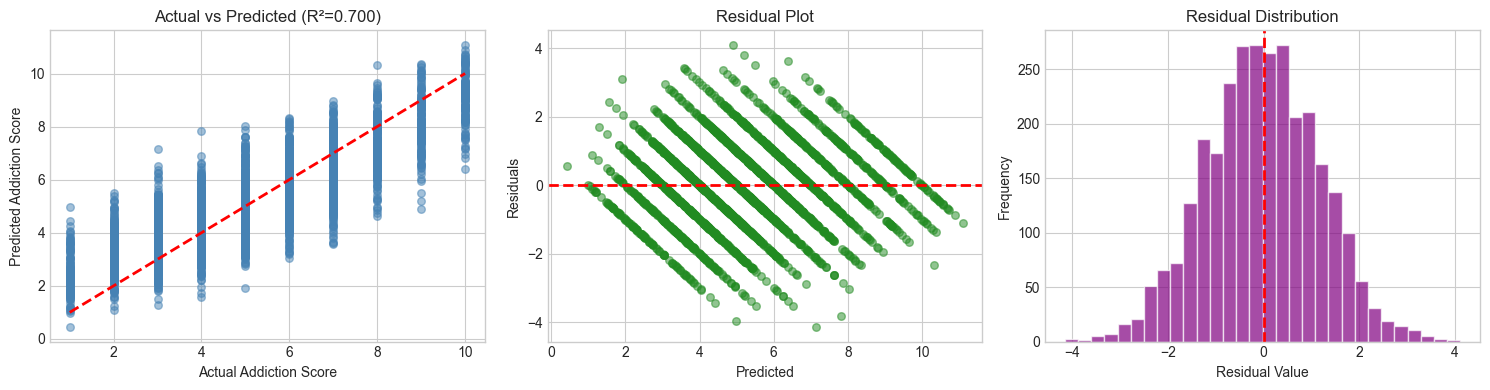


Top 10 Features by Coefficient Magnitude:
                    Feature  Coefficient
      Avg_Daily_Usage_Hours     1.243403
Conflicts_Over_Social_Media     0.635827
      Sleep_Hours_Per_Night    -0.489780
        Mental_Health_Score    -0.376849
    Digital_Life_Percentage     0.203819
          Toxic_Usage_Score    -0.122762
 Most_Used_Platform_YouTube    -0.111159
 Most_Used_Platform_Twitter    -0.072286
Most_Used_Platform_Snapchat    -0.062092
             Escapism_Ratio    -0.060710


In [140]:
# ============================================================
# 13. MODEL 4: LINEAR REGRESSION
# ============================================================
print("=" * 60)
print("LINEAR REGRESSION (Predicting Addicted_Score)")
print("=" * 60)

lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_model.predict(X_test_reg)

# Metrics
lr_mse = mean_squared_error(y_test_reg, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test_reg, y_pred_lr)
lr_r2 = r2_score(y_test_reg, y_pred_lr)

print(f"\n✓ Model trained successfully")
print(f"\nRegression Metrics:")
print(f"  MSE:  {lr_mse:.4f}")
print(f"  RMSE: {lr_rmse:.4f}")
print(f"  MAE:  {lr_mae:.4f}")
print(f"  R²:   {lr_r2:.4f}")

lr_results = {
    'mse': lr_mse, 'rmse': lr_rmse, 'mae': lr_mae, 'r2': lr_r2,
    'y_pred': y_pred_lr
}

# Regression visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Actual vs Predicted
axes[0].scatter(y_test_reg, y_pred_lr, alpha=0.5, s=30, color='steelblue')
axes[0].plot([y_test_reg.min(), y_test_reg.max()],
             [y_test_reg.min(), y_test_reg.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Addiction Score')
axes[0].set_ylabel('Predicted Addiction Score')
axes[0].set_title(f'Actual vs Predicted (R²={lr_r2:.3f})')

# Residuals
residuals = y_test_reg - y_pred_lr
axes[1].scatter(y_pred_lr, residuals, alpha=0.5, s=30, color='forestgreen')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Residual distribution
axes[2].hist(residuals, bins=30, color='purple', edgecolor='white', alpha=0.7)
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Residual Value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Residual Distribution')

plt.tight_layout()
plt.savefig('visualizations/linear_regression_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Top coefficients
coef_df = pd.DataFrame({
    'Feature': X_train_reg.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 10 Features by Coefficient Magnitude:")
print(coef_df.head(10).to_string(index=False))

## Cell 18: K-Means Clustering

In [141]:
# ============================================================
# 14. MODEL 5: K-MEANS CLUSTERING
# ============================================================
print("=" * 60)
print("K-MEANS CLUSTERING")
print("=" * 60)

# Find optimal K
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    km_temp = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    km_temp.fit(X_kmeans_scaled)
    inertias.append(km_temp.inertia_)
    silhouettes.append(silhouette_score(X_kmeans_scaled, km_temp.labels_))

optimal_k = K_range[np.argmax(silhouettes)]
print(f"\n✓ Optimal K by Silhouette Score: {optimal_k}")
print(f"  Best Silhouette Score: {max(silhouettes):.4f}")

# Train final model
kmeans_model = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE, n_init=10)
clusters = kmeans_model.fit_predict(X_kmeans_scaled)

km_silhouette = silhouette_score(X_kmeans_scaled, clusters)
print(f"\n✓ Final Model Trained")
print(f"  Silhouette Score: {km_silhouette:.4f}")
print(f"  Inertia: {kmeans_model.inertia_:.2f}")

# Cluster distribution
print(f"\nCluster Distribution:")
unique, counts = np.unique(clusters, return_counts=True)
for c, n in zip(unique, counts):
    print(f"  Cluster {c}: {n} students ({100*n/len(clusters):.1f}%)")

km_results = {
    'silhouette': km_silhouette,
    'inertia': kmeans_model.inertia_,
    'n_clusters': optimal_k,
    'clusters': clusters
}

K-MEANS CLUSTERING


MemoryError: Unable to allocate 763. MiB for an array with shape (10000, 10000) and data type float64

## Cell 19: K-Means Visualizations

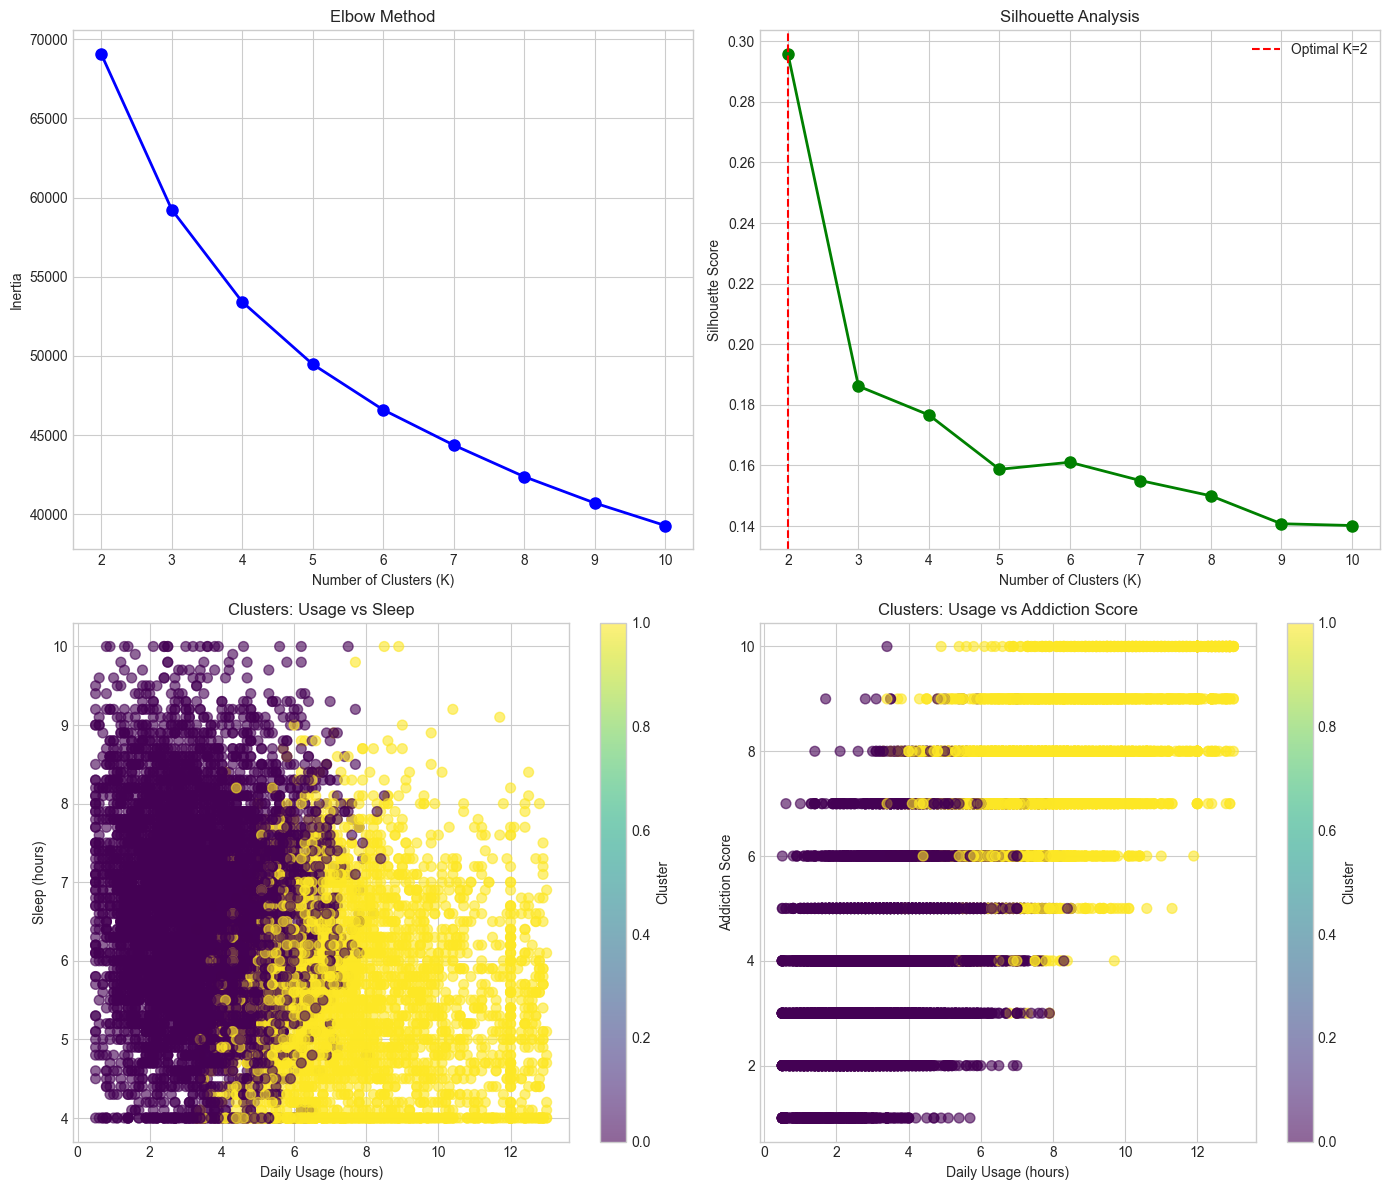


Cluster Profiles (Mean Values):
         Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  Addicted_Score  Mental_Health_Score  Conflicts_Over_Social_Media
Cluster                                                                                                                
0                         3.45                   6.61            4.20                 6.13                         1.96
1                         7.95                   5.57            7.58                 4.90                         2.87


In [103]:
# K-Means Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Elbow plot
axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (K)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Elbow Method')
axes[0, 0].set_xticks(list(K_range))

# Silhouette plot
axes[0, 1].plot(K_range, silhouettes, 'go-', linewidth=2, markersize=8)
axes[0, 1].axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
axes[0, 1].set_xlabel('Number of Clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Analysis')
axes[0, 1].set_xticks(list(K_range))
axes[0, 1].legend()

# Cluster scatter: Usage vs Sleep
scatter1 = axes[1, 0].scatter(
    df['Avg_Daily_Usage_Hours'], df['Sleep_Hours_Per_Night'],
    c=clusters, cmap='viridis', alpha=0.6, s=50
)
axes[1, 0].set_xlabel('Daily Usage (hours)')
axes[1, 0].set_ylabel('Sleep (hours)')
axes[1, 0].set_title('Clusters: Usage vs Sleep')
plt.colorbar(scatter1, ax=axes[1, 0], label='Cluster')

# Cluster scatter: Usage vs Addiction
scatter2 = axes[1, 1].scatter(
    df['Avg_Daily_Usage_Hours'], df['Addicted_Score'],
    c=clusters, cmap='viridis', alpha=0.6, s=50
)
axes[1, 1].set_xlabel('Daily Usage (hours)')
axes[1, 1].set_ylabel('Addiction Score')
axes[1, 1].set_title('Clusters: Usage vs Addiction Score')
plt.colorbar(scatter2, ax=axes[1, 1], label='Cluster')

plt.tight_layout()
plt.savefig('visualizations/kmeans_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Cluster profiles
print("\nCluster Profiles (Mean Values):")
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

cluster_profile = df_with_clusters.groupby('Cluster')[
    ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Addicted_Score',
     'Mental_Health_Score', 'Conflicts_Over_Social_Media']
].mean().round(2)

print(cluster_profile.to_string())

## Cell 20: Save Models

In [104]:
# ============================================================
# 15. SAVE MODELS & ARTIFACTS
# ============================================================
print("=" * 60)
print("SAVING MODELS & ARTIFACTS")
print("=" * 60)

# Create directories
os.makedirs('models', exist_ok=True)
os.makedirs('visualizations', exist_ok=True)

# Save models
joblib.dump(dt_model, 'models/decision_tree_model.pkl')
joblib.dump(nb_model, 'models/naive_bayes_model.pkl')
joblib.dump(nn_model, 'models/neural_network_model.pkl')
joblib.dump(lr_model, 'models/linear_regression_model.pkl')
joblib.dump(kmeans_model, 'models/kmeans_model.pkl')
print("✓ Models saved")

# Save scalers
joblib.dump(scaler_class, 'models/scaler_class.pkl')
joblib.dump(scaler_reg, 'models/scaler_reg.pkl')
joblib.dump(scaler_kmeans, 'models/scaler_kmeans.pkl')
print("✓ Scalers saved")

# Save encoders
joblib.dump(label_encoders, 'models/label_encoders.pkl')
print("✓ Label encoders saved")

# Save feature information
feature_info = {
    'X_class_columns': X_train_oh.columns.tolist(),
    'X_reg_columns': X_train_reg.columns.tolist(),
    'kmeans_columns': kmeans_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols
}
joblib.dump(feature_info, 'models/feature_info.pkl')
print("✓ Feature info saved")

print("\n" + "=" * 60)
print("ALL MODELS SAVED SUCCESSFULLY!")
print("=" * 60)
print("\nFiles created:")
print("  models/decision_tree_model.pkl")
print("  models/naive_bayes_model.pkl")
print("  models/neural_network_model.pkl")
print("  models/linear_regression_model.pkl")
print("  models/kmeans_model.pkl")
print("  models/scaler_class.pkl")
print("  models/scaler_reg.pkl")
print("  models/scaler_kmeans.pkl")
print("  models/label_encoders.pkl")
print("  models/feature_info.pkl")

SAVING MODELS & ARTIFACTS
✓ Models saved
✓ Scalers saved
✓ Label encoders saved
✓ Feature info saved

ALL MODELS SAVED SUCCESSFULLY!

Files created:
  models/decision_tree_model.pkl
  models/naive_bayes_model.pkl
  models/neural_network_model.pkl
  models/linear_regression_model.pkl
  models/kmeans_model.pkl
  models/scaler_class.pkl
  models/scaler_reg.pkl
  models/scaler_kmeans.pkl
  models/label_encoders.pkl
  models/feature_info.pkl


## Cell 21: Final Summary

In [105]:
# ============================================================
# 16. FINAL PROJECT SUMMARY
# ============================================================
print("=" * 70)
print("PROJECT SUMMARY")
print("=" * 70)

print("\n📊 DATASET:")
print(f"  • Samples: {len(df)}")
print(f"  • Features (after engineering): {len(feature_cols)}")
print(f"  • New features created: 5 (Region, Sleep_Deficit, Usage_Sleep_Ratio,")
print(f"                            Relationship_Strain, Addiction_Risk_Score)")

print("\n🎯 CLASSIFICATION (Target: Affects_Academic_Performance)")
print(f"  {'Model':<20} {'Accuracy':<12} {'F1-Score':<12} {'ROC-AUC':<12}")
print(f"  {'-'*56}")
print(f"  {'Decision Tree':<20} {dt_accuracy:<12.4f} {dt_f1:<12.4f} {dt_auc:<12.4f}")
print(f"  {'Naive Bayes':<20} {nb_accuracy:<12.4f} {nb_f1:<12.4f} {nb_auc:<12.4f}")
print(f"  {'Neural Network':<20} {nn_accuracy:<12.4f} {nn_f1:<12.4f} {nn_auc:<12.4f}")

print("\n📈 REGRESSION (Target: Addicted_Score)")
print(f"  Linear Regression: R²={lr_r2:.4f}, RMSE={lr_rmse:.4f}, MAE={lr_mae:.4f}")

print("\n👥 CLUSTERING")
print(f"  K-Means (K={optimal_k}): Silhouette Score={km_silhouette:.4f}")

print("\n✅ NEXT STEP:")
print("  Run the Streamlit app: streamlit run streamlit_app.py")
print("=" * 70)

PROJECT SUMMARY

📊 DATASET:
  • Samples: 10000
  • Features (after engineering): 18
  • New features created: 5 (Region, Sleep_Deficit, Usage_Sleep_Ratio,
                            Relationship_Strain, Addiction_Risk_Score)

🎯 CLASSIFICATION (Target: Affects_Academic_Performance)
  Model                Accuracy     F1-Score     ROC-AUC     
  --------------------------------------------------------
  Decision Tree        0.8263       0.6658       0.8244      
  Naive Bayes          0.8607       0.7321       0.9156      
  Neural Network       0.8730       0.7547       0.9214      

📈 REGRESSION (Target: Addicted_Score)
  Linear Regression: R²=0.7001, RMSE=1.1872, MAE=0.9502

👥 CLUSTERING
  K-Means (K=2): Silhouette Score=0.2958

✅ NEXT STEP:
  Run the Streamlit app: streamlit run streamlit_app.py
